# 단일 표본 T-Test (One Sample T-Test)

- 하나의 모집단 평균이 이전보다 커졌는지/작아졌는지/달라졌는지 통계적으로 알아보기 위해 사용

- 기존에 알려져 있던 사실이 현재는 어떻게 변화했는지 확인하는 방법

- 단일 표본 T-test에서는 데이터의 정규성만을 확인하고 등분산성은 확인하지 않음

- 등분산성은 두 개 이상의 집단일 경우에만 확인

In [2]:
import warnings 
warnings.filterwarnings(action='ignore')

import sys 
import seaborn as sns 
from math import sqrt
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from scipy.stats import t, ttest_1samp, normaltest

In [3]:
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 9 
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams['axes.unicode_minus'] = False

#### 예제1 - 강아지 체온 변화

- 주어진 데이터는 강아지 25마리의 체온을 측정한 데이터

- 과거의 자료에서 강아지의 평균 체온은 24.3으로 알려져 있음

- 이번에 조사한 데이터에서도 강아지의 평균 체온이 24.3이라고 해도 좋은지 확인

- 주어진 데이터가 정규성을 충족하는지 확인한 후 정규성이 충족된다면 강아지의 평균 체온에 대한 가설검정을 수행

In [4]:
origin = pd.read_excel("../rawdata/temperature.xlsx")
origin

,체온
0,25.8
1,24.6
2,26.1
3,22.9
4,25.1
5,27.3
6,24.0
7,24.5
8,23.9
9,26.2


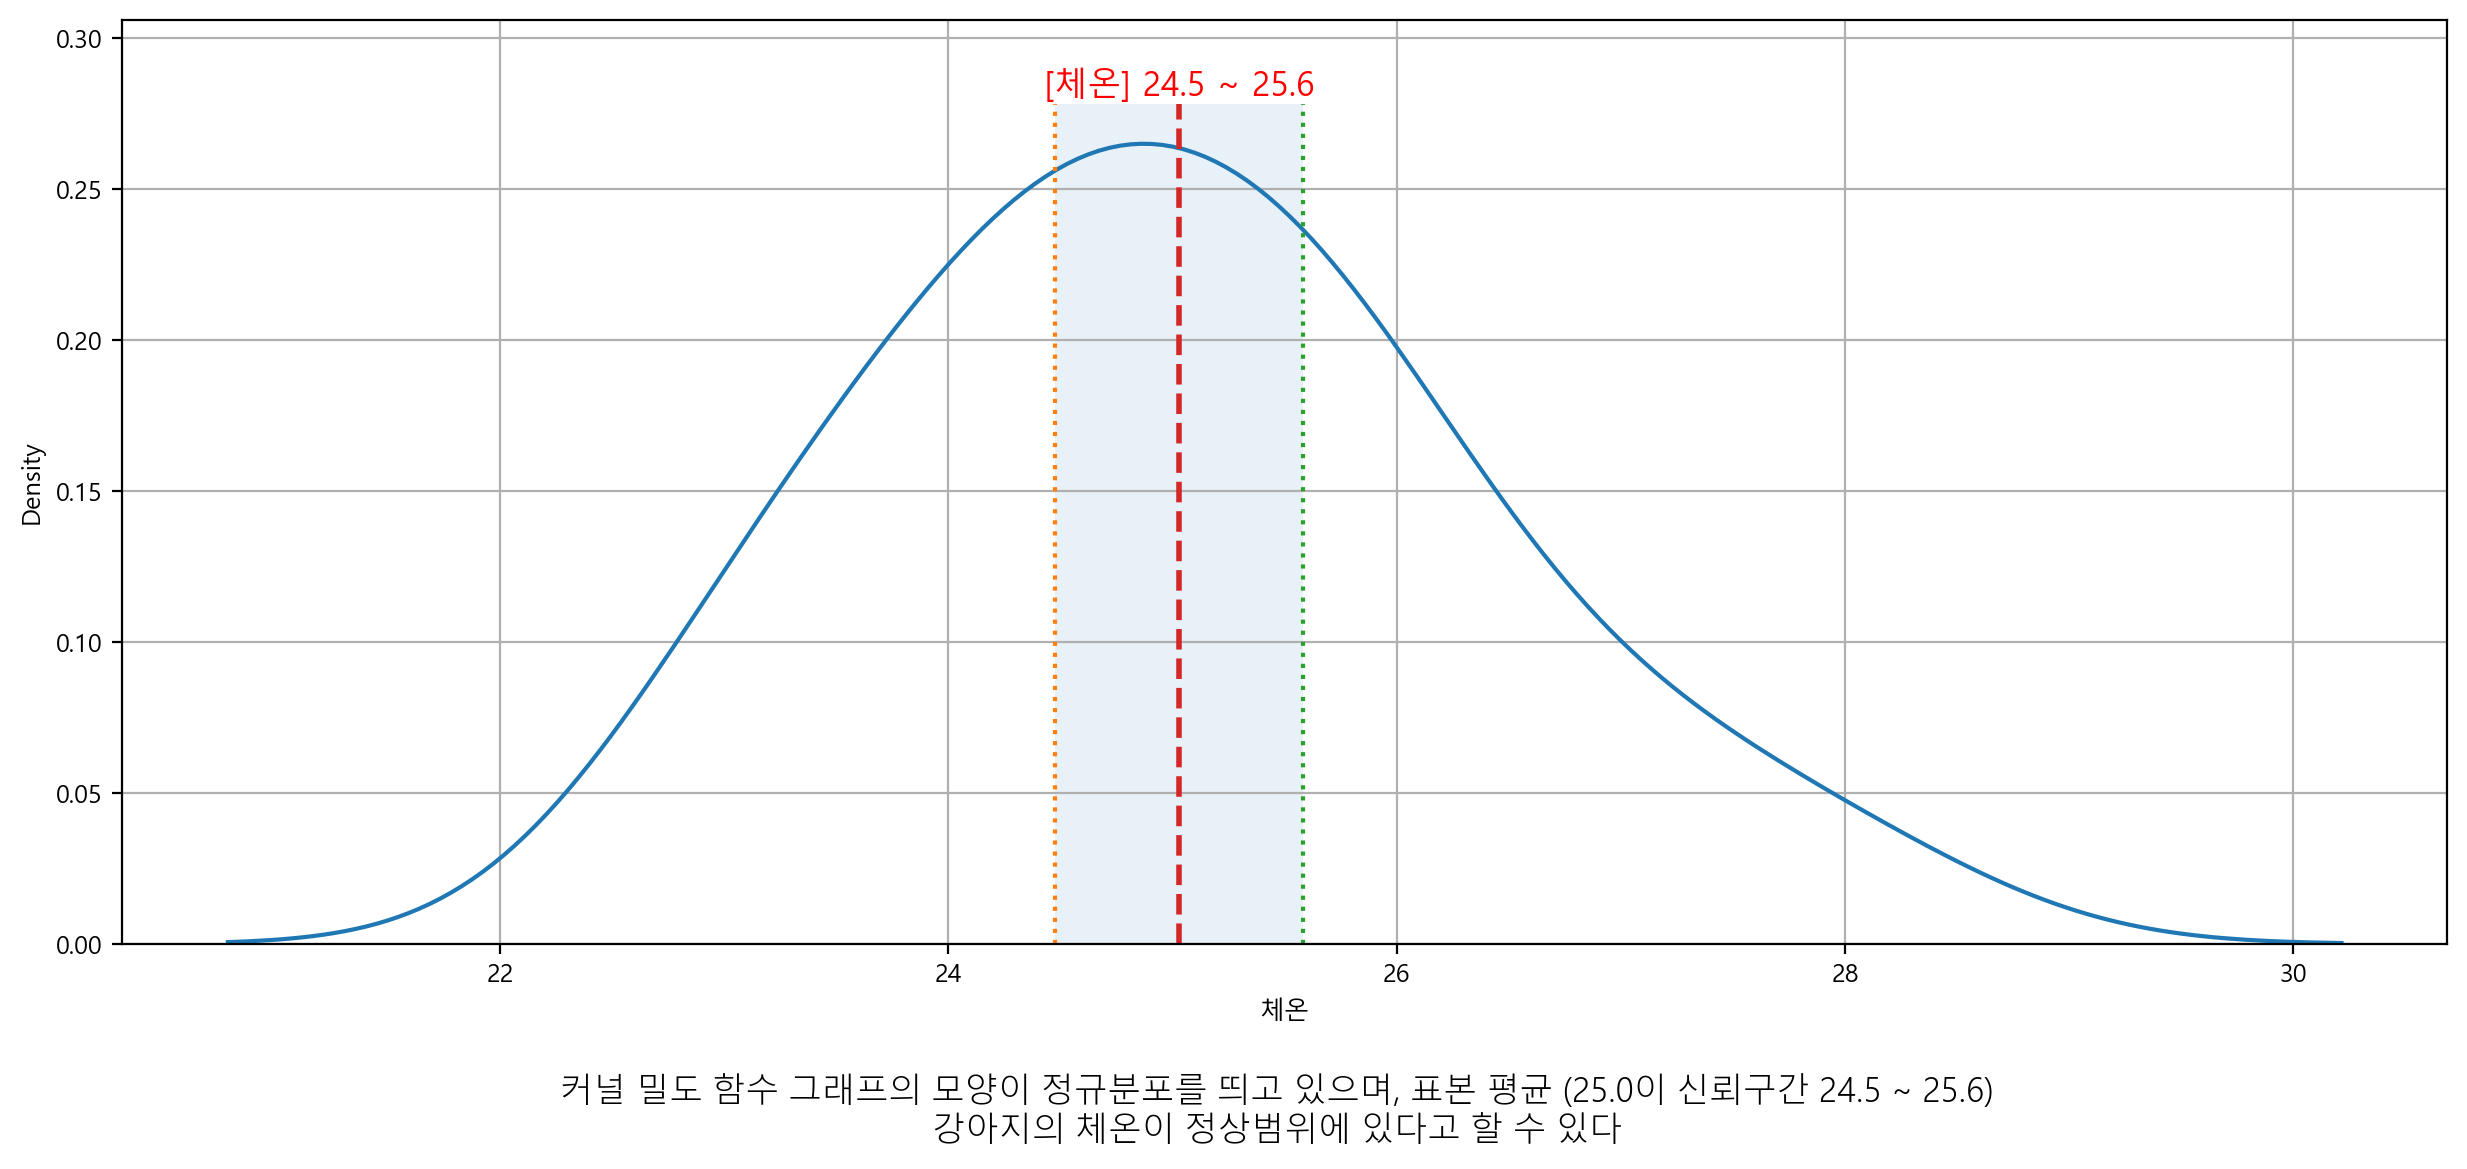

In [5]:
# 신뢰구간 확인

plt.figure()
data = origin['체온']                           # 데이터만 추출
max = data.max()                                # 최대값
clevel = 0.95                                   # 신뢰수준
dof = len(data)                                 # 자유도
sample_mean = data.mean()                       # 표본평균
sample_std = data.std(ddof=1)                   # 표본표준편차
sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차

# 신뢰구간
cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

sns.kdeplot(data = data)

xmin, xmax, ymin, ymax = plt.axis()

# 신뢰구간 그리기
plt.plot([cmin, cmin], [0, ymax], linestyle=":")
plt.plot([cmax, cmax], [0, ymax], linestyle=":")
plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

# 평균 그리기 
plt.plot([sample_mean, sample_mean], [0, ymax], linestyle="--", linewidth=2)

plt.text(x=(cmax - cmin) / 2 + cmin,
         y=ymax,
         s="[%s] %0.1f ~ %0.1f" % (data.name, cmin, cmax),
         horizontalalignment="center",
         verticalalignment="bottom",
         fontdict={"size": 12, "color": "red"})

plt.ylim(ymin, ymax * 1.1)

txt = """커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 표본 평균 ({:.1f}이 신뢰구간 {:.1f} ~ {:.1f})
강아지의 체온이 정상범위에 있다고 할 수 있다""".format(sample_mean, cmin, cmax)

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight" : "light"})
plt.grid()
plt.show()

In [6]:
# 데이터 정규성 검정
s, p = normaltest(origin['체온'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s, p, p>=0.05)

'statistic: 0.819, p-value: 0.664, 정규성 충족 여부: True'

In [7]:
# 강아지의 평균 체온이 이전에 알려져 있던 24.3과 달라졌는지 여부 

s, p = ttest_1samp(origin['체온'], 24.3)
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p < 0.05 else "귀무")

# 일표본 T검정에 대한 유의확률값이 0.012로 통상적인 유의수준 0.05보다 작으므로 유의수준 0.05에서 강아지 25마리의 체온이 추출된 모집단의 평균인 24.3이라고 할 수 없음

'statistic: 2.713, p-value: 0.012, 대립가설 채택'

In [8]:
# 강아지의 평균체온이 과거의 자료인 24.3보다 작아졌는지 알고자 할 경우
# alternative 파라미터에 less 설정

# 귀무가설은 24.3보다 작지 않다(크거나 같다)
s, p = ttest_1samp(origin['체온'], 24.3, alternative='less')
"statistic: {0:.3f}, p-value:{1:.3f}, {2} 가설 채택".format(s, p, "대립" if p < 0.05 else "귀무")

'statistic: 2.713, p-value:0.994, 귀무 가설 채택'

In [9]:
# 강아지의 평균체온이 과거의 자료인 24.3보다 커졌는지 알고자 할 경우
# alternative 파라미터에 greater 설정

# 귀무가설은 24.3보다 크지 않다(작거나 같다)
s, p = ttest_1samp(origin['체온'], 24.3, alternative='greater')
"statistic: {0:.3f}, p-value:{1:.3f}, {2} 가설 채택".format(s, p, "대립" if p < 0.05 else "귀무")

'statistic: 2.713, p-value:0.006, 대립 가설 채택'

#### 예제2 - 생명보험 가입 금액 평균 비교

- 주어진 데이터는 3년에 한 번씩 생명보험협회에서 실시하는 생명보험 전국 성향조사의 일부

- 모평균이 1억원이라고 할 수 있는지 유의수준 5%에서 검정


구분 | 설명

직업 | 1 : 육체노동, 2: 정신노동(직장인), 3: 자영업

교육수준 | 1: 초등학교 이하, 2: 중졸 및 고졸, 3:대졸, 4:대학원 졸

성별 | 1: 남자, 2: 여자

가입금액 | 단위 = 천만원

월수입 | 단위 = 만원

In [10]:
origin = pd.read_excel("../rawdata/insur.xlsx")
origin

,직업,교육수준,성별,나이,가입금액,월수입
0,1,2,1,35,15.0,100
1,2,3,1,40,10.0,150
2,2,3,2,36,8.0,120
3,3,4,2,38,12.0,140
4,1,1,1,45,10.0,150
5,2,2,1,48,2.5,200
6,3,3,2,50,9.0,90
7,3,3,1,53,7.5,180
8,2,2,1,49,5.5,250
9,3,4,1,55,25.0,300


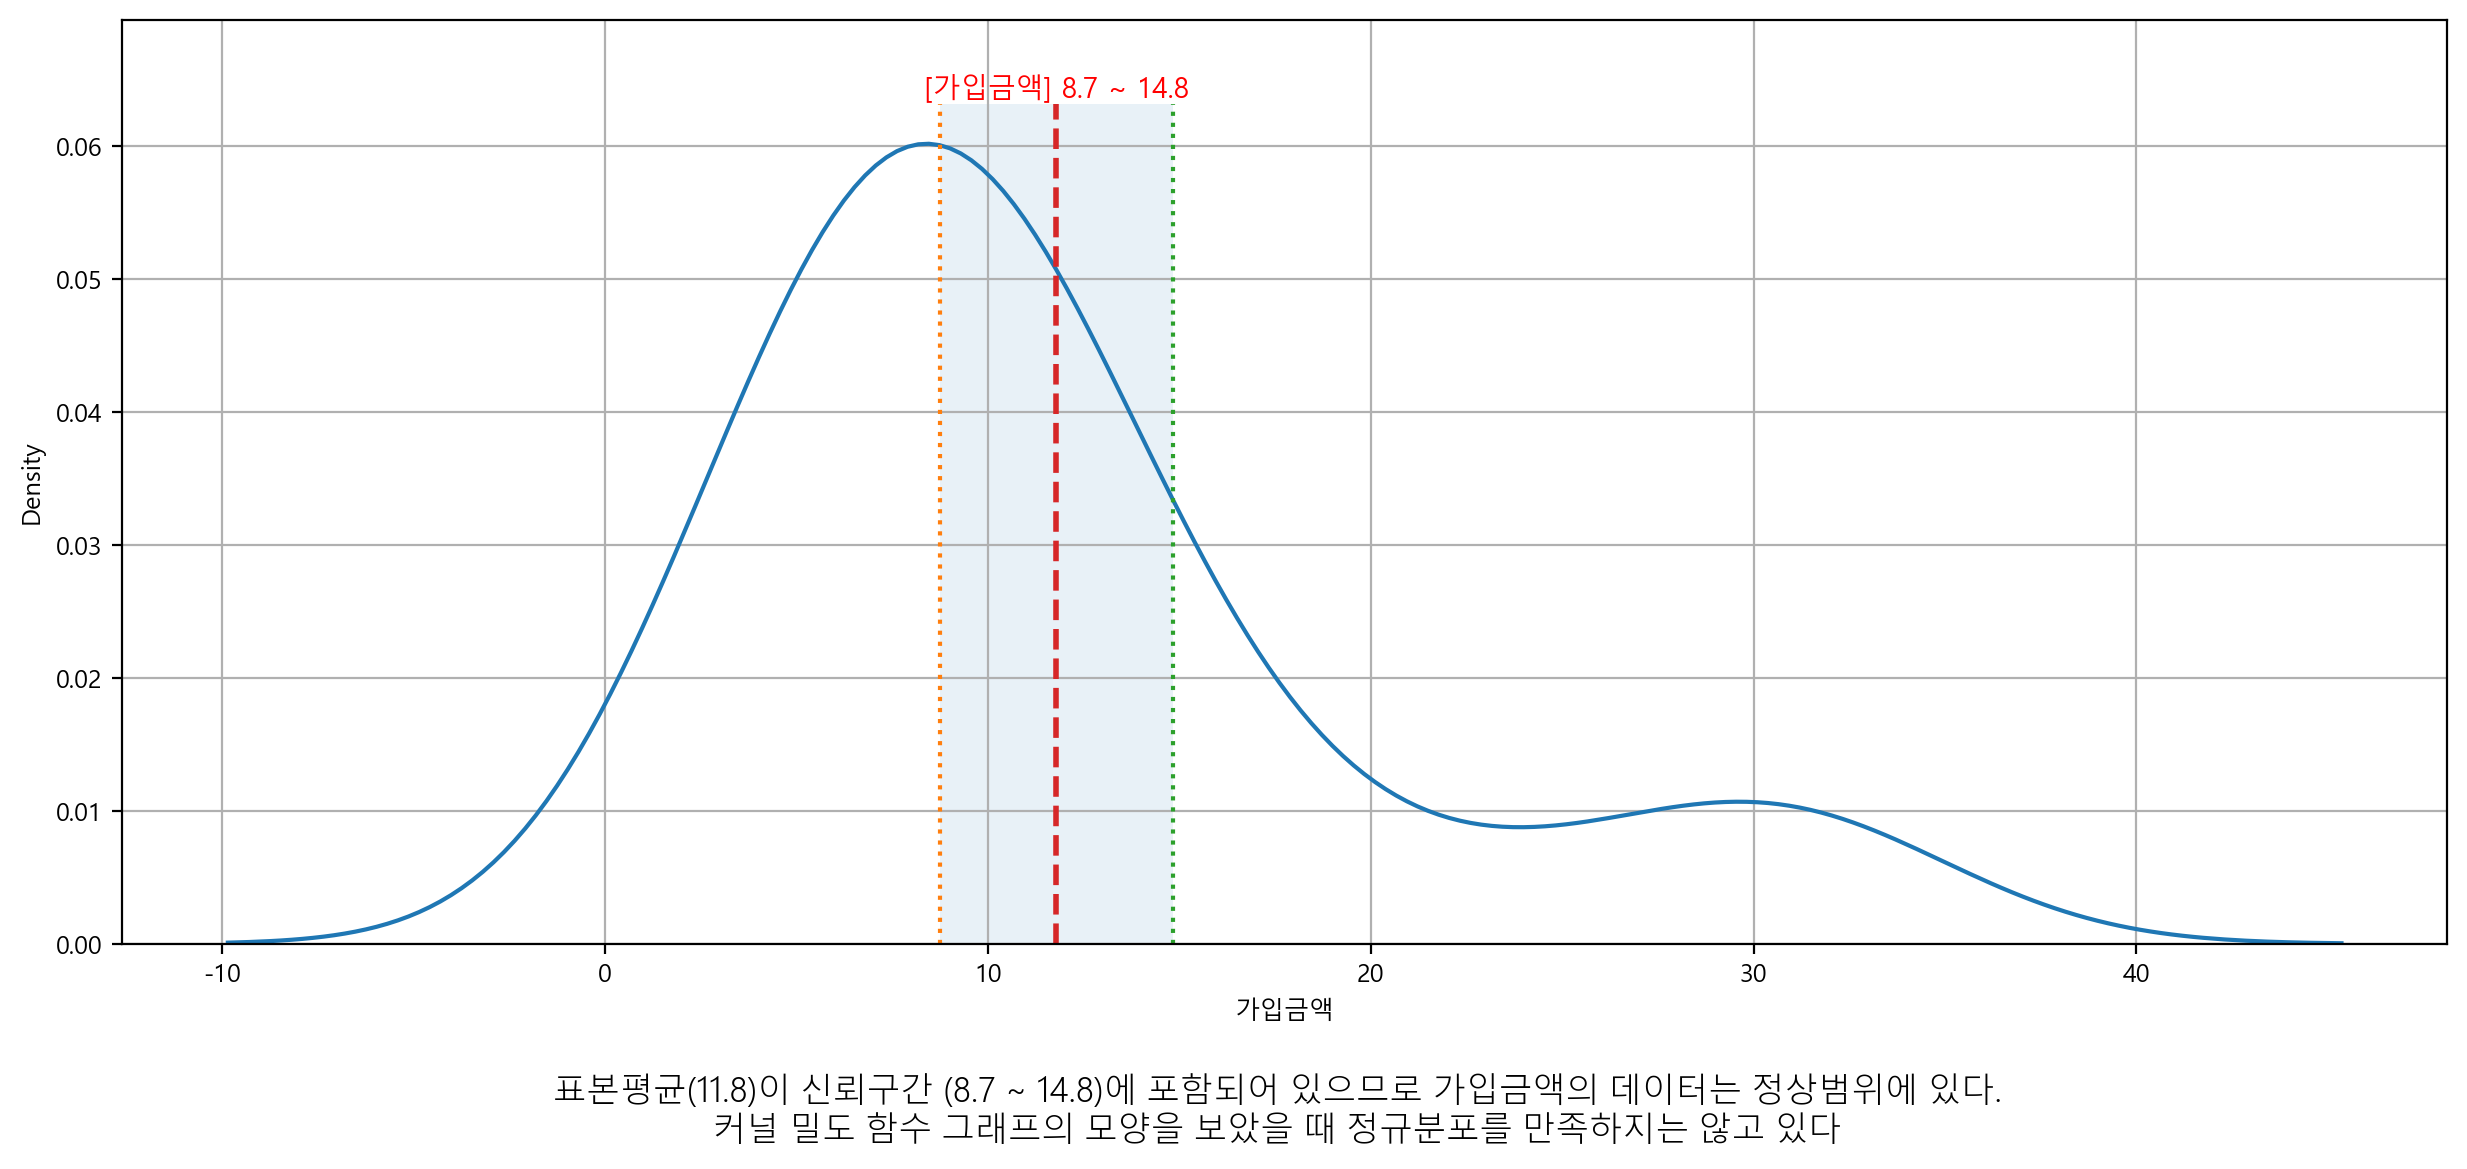

In [15]:
# 신뢰구간 확인

plt.figure()

data = origin['가입금액']                         # 데이터만 추출
max = data.max()                                 # 최대값
clevel = 0.95                                    # 신뢰수준
dof = len(data) - 1                              # 자유도 
sample_mean = data.mean()                        # 표본평균
sample_std = data.std(ddof=1)                    # 표본표준편차
sample_std_error = sample_std / sqrt(len(data))  # 표본표준오차 

# 신뢰구간
cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

sns.kdeplot(data = data)

xmin, xmax, ymin, ymax  = plt.axis()
# 신뢰구간 그리기
plt.plot([cmin, cmin], [0, ymax], linestyle=":")
plt.plot([cmax, cmax], [0, ymax], linestyle=":")
plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

# 평균 그리기
plt.plot([sample_mean, sample_mean], [0, ymax], linestyle="--", linewidth=2)

plt.text(x=(cmax-cmin) / 2 + cmin,
         y=ymax,
         s="[%s] %0.1f ~ %0.1f" % (data.name, cmin, cmax),
         horizontalalignment="center",
         verticalalignment="bottom",
         fontdict={"size": 10, "color" : "red"})

plt.ylim(ymin, ymax*1.1)

txt = """표본평균({:.1f})이 신뢰구간 ({:.1f} ~ {:.1f})에 포함되어 있으므로 가입금액의 데이터는 정상범위에 있다.
커널 밀도 함수 그래프의 모양을 보았을 때 정규분포를 만족하지는 않고 있다""".format(sample_mean, cmin, cmax)

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.grid()
plt.show()

In [16]:
# 데이터의 정규성 검정
s, p = normaltest(origin['가입금액'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s, p, p>=0.05)

# 주어진 데이터는 p-value가 0.003이므로 정규성을 충족하지 않음 
# 따라서 이 경우 가설검정의 결과를 신뢰할 수 없음

'statistic: 11.438, p-value: 0.003, 정규성 충족 여부: False'

In [18]:
# 데이터의 로그 변환 
log_data = np.log(origin['가입금액'])

# 변환 후 정규성 검정
s, p = normaltest(log_data)
"statistic: {0:.3f}, {1:.3f}, 정규성 충족: {2}".format(s, p, p>=0.05)

'statistic: 0.104, 0.950, 정규성 충족: True'

In [25]:
# 가입금액의 평균이 1억원과 같은지, 다른지 여부 

s, p = ttest_1samp(log_data, np.log(10))
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p < 0.05 else "귀무")

# 단일 표본 검정에서 유의확률이 유의수준 0.05보다 크므로 귀무가설을 기각할 수 없음 
# 보험 가입금액 평균은 1억원

'statistic: -0.326, p-value: 0.747, 귀무가설 채택'

In [26]:
s, p = ttest_1samp(log_data, np.log(10), alternative="less")
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p < 0.05 else "귀무")


'statistic: -0.326, p-value: 0.374, 귀무가설 채택'

In [28]:
s, p = ttest_1samp(log_data, np.log(10), alternative="greater")
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p < 0.05 else "귀무")


'statistic: -0.326, p-value: 0.626, 귀무가설 채택'